In [1059]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
from scipy.stats import norm, skew
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.special import boxcox1p
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.exceptions import NotFittedError
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

In [1060]:
test=pd.read_csv('..//dir//')
ids = test["Id"]
test.shape

(1459, 80)

In [1061]:
train=pd.read_csv('..//dir//')
train.shape

(1460, 81)

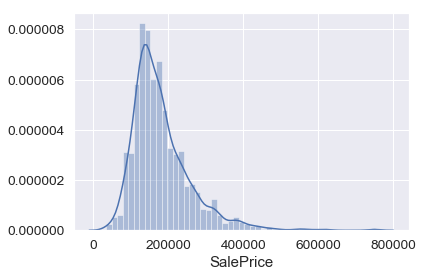

In [1062]:
def plot(x,y): 
    sns.distplot(x.loc[:,y], norm_hist=True)
plot(train, 'SalePrice')

In [1063]:
train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [1064]:
print(train['SalePrice'].skew())
print(train['SalePrice'].kurt())

1.8828757597682129
6.536281860064529


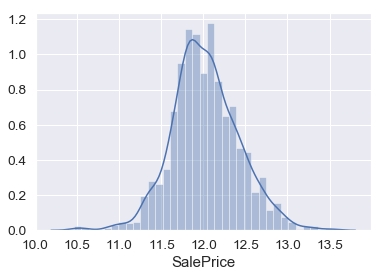

In [1065]:
train['SalePrice'] = np.log1p(train['SalePrice'])
sns.distplot(train['SalePrice'])

In [1066]:
train['SalePrice'].describe()

count    1460.000000
mean       12.024057
std         0.399449
min        10.460271
25%        11.775105
50%        12.001512
75%        12.273736
max        13.534474
Name: SalePrice, dtype: float64

In [1067]:
test=test.drop('Id',1)
test.shape

(1459, 79)

In [1068]:
train=train.drop('Id',1)
train.shape

(1460, 80)

In [1069]:
train.corr()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,-0.065649,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.073959
LotFrontage,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,0.049900,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.355879
LotArea,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,0.111170,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.257320
OverallQual,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,-0.059119,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.817185
OverallCond,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,0.040229,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.036868
YearBuilt,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,-0.049107,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.586570
YearRemodAdd,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,-0.067759,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.565608
MasVnrArea,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,-0.072319,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.430809
BsmtFinSF1,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,-0.050117,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.372023
BsmtFinSF2,-0.065649,0.049900,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.072319,-0.050117,1.000000,...,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706,0.004832


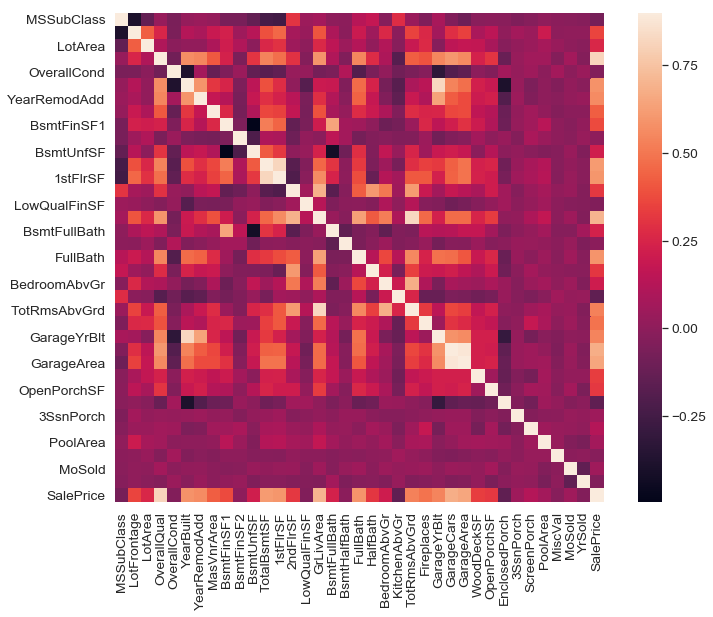

In [1070]:
corrmat = train.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'YearBuilt', 'YearRemodAdd'],
      dtype='object')


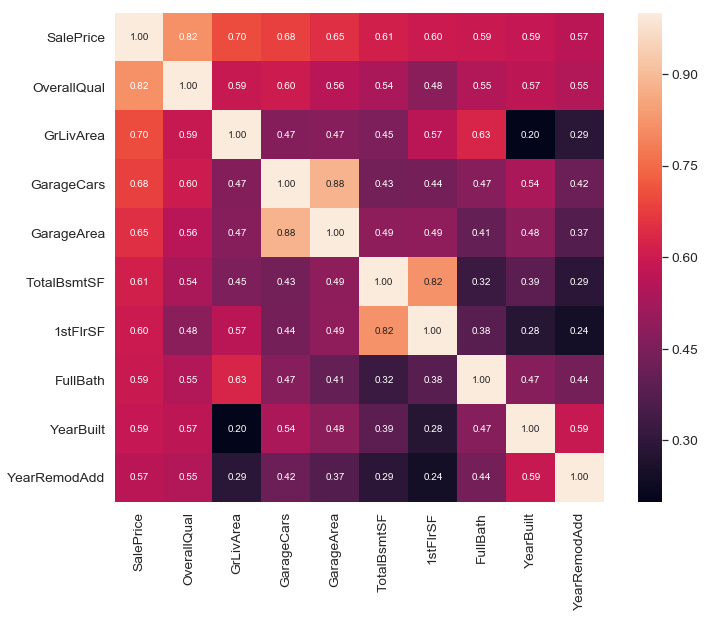

In [1071]:
n=10
cor=train.corr()
features = cor.nlargest(n, 'SalePrice').index
print(features)
fig, axes = plt.subplots(figsize=(12, 9))
cormap = np.corrcoef(train[features].values.T)
sns.set(font_scale=1.25)
heatmap = sns.heatmap(cormap, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=features.values, xticklabels=features.values)
plt.show()

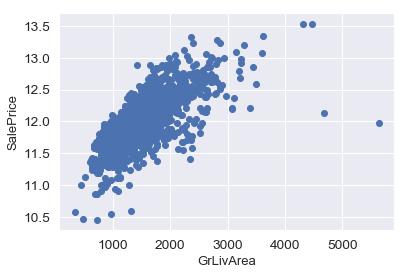

In [1072]:
fig, ax = plt.subplots()
ax.scatter(x = train['GrLivArea'], y = train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

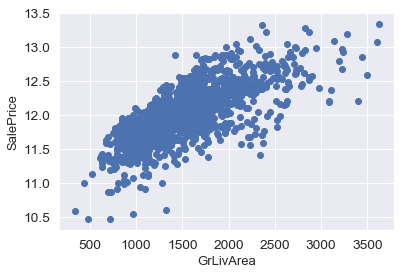

In [1073]:
train = train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<300000)].index)
fig, ax = plt.subplots()
ax.scatter(train['GrLivArea'], train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

In [1074]:
merged_data=pd.concat([train,test],ignore_index=True)
merged_data.shape

(2915, 80)

In [1075]:
Y=train['SalePrice']
data=merged_data.drop('SalePrice',1)
data.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,NaN,3,1Fam,TA,No,706.0,0.0,...,WD,0,Pave,8,856.0,AllPub,0,2003,2003,2008
1,1262,0,0,NaN,3,1Fam,TA,Gd,978.0,0.0,...,WD,0,Pave,6,1262.0,AllPub,298,1976,1976,2007
2,920,866,0,NaN,3,1Fam,TA,Mn,486.0,0.0,...,WD,0,Pave,6,920.0,AllPub,0,2001,2002,2008
3,961,756,0,NaN,3,1Fam,Gd,No,216.0,0.0,...,WD,0,Pave,7,756.0,AllPub,0,1915,1970,2006
4,1145,1053,0,NaN,4,1Fam,TA,Av,655.0,0.0,...,WD,0,Pave,9,1145.0,AllPub,192,2000,2000,2008


In [1076]:
data.dtypes.value_counts()

object     43
int64      25
float64    11
dtype: int64

In [1077]:
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(38)

,Total,Percent
PoolQC,2907,0.997256
MiscFeature,2810,0.963979
Alley,2717,0.932075
Fence,2345,0.804460
FireplaceQu,1420,0.487136
LotFrontage,486,0.166724
GarageFinish,159,0.054545
GarageQual,159,0.054545
GarageYrBlt,159,0.054545
GarageCond,159,0.054545


In [1078]:
data=data.drop(['PoolQC','MiscFeature','Alley','Fence','FireplaceQu','Utilities'],1)
data.shape

(2915, 73)

In [1079]:
for column in ('GarageYrBlt', 'GarageArea', 'GarageCars','BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
            'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath',"MasVnrArea"):
    data[column] = data[column].fillna(0)

In [1080]:
for columns in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond','BsmtQual', 
                'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2','MasVnrType',):
    data[columns] = data[columns].fillna('NONE')

In [1081]:
data['MSZoning'] = data['MSZoning'].fillna(data['MSZoning'].mode()[0])
data['Electrical'] = data['Electrical'].fillna(data['Electrical'].mode()[0])
data['KitchenQual'] = data['KitchenQual'].fillna(data['KitchenQual'].mode()[0])
data['Exterior1st'] = data['Exterior1st'].fillna(data['Exterior1st'].mode()[0])
data['Exterior2nd'] = data['Exterior2nd'].fillna(data['Exterior2nd'].mode()[0])
data['SaleType'] = data['SaleType'].fillna(data['SaleType'].mode()[0])
data['Functional'] = data['Functional'].fillna(data['Functional'].mode()[0])
data["LotFrontage"] = data.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

In [1082]:
data_na = (data.isnull().sum() / len(data)) * 100
data_na = data_na.drop(data_na[data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :data_na})
missing_data.head()

,Missing Ratio


In [1083]:
numeric_feats = data.dtypes[data.dtypes != "object"].index
skewed_feats = data[numeric_feats].apply(lambda x: skew(x)).sort_values(ascending=False)
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(20)

,Skew
MiscVal,21.932147
PoolArea,18.701829
LotArea,13.123758
LowQualFinSF,12.080315
3SsnPorch,11.368094
KitchenAbvGr,4.298845
BsmtFinSF2,4.142863
EnclosedPorch,4.000796
ScreenPorch,3.943508
BsmtHalfBath,3.942892


In [1084]:
data = pd.get_dummies(data)
print(data.shape)

(2915, 277)


In [1085]:
#scaler = StandardScaler()
#data_scaled = scaler.fit_transform(data)
#data_scaled[:5]

In [1086]:
skewed_features = skewness.index
lam = 0.5

for feat in skewed_features:
    data[feat] = boxcox1p(data[feat], lam)


In [1087]:
pca = PCA(whiten=True)
pca.fit(data)
variance = pd.DataFrame(pca.explained_variance_ratio_)
np.cumsum(pca.explained_variance_ratio_)

array([0.42398826, 0.57167788, 0.68154962, 0.77564955, 0.83503414,
       0.8642549 , 0.893079  , 0.91903503, 0.94216728, 0.95574463,
       0.9665412 , 0.97525419, 0.98238221, 0.98719371, 0.99015179,
       0.9927234 , 0.99493173, 0.99629025, 0.99732036, 0.99783634,
       0.99807295, 0.99824216, 0.99838511, 0.99846857, 0.99853139,
       0.99859077, 0.99864137, 0.99868895, 0.99873385, 0.99877648,
       0.99881849, 0.99885996, 0.99889731, 0.99893271, 0.99896771,
       0.9989994 , 0.99903028, 0.99905881, 0.99908661, 0.9991138 ,
       0.99914006, 0.99916564, 0.99918974, 0.99921298, 0.99923524,
       0.99925709, 0.99927788, 0.99929774, 0.99931714, 0.99933595,
       0.99935379, 0.99937108, 0.99938771, 0.99940394, 0.99941991,
       0.99943515, 0.9994502 , 0.99946484, 0.99947896, 0.99949258,
       0.99950597, 0.99951896, 0.99953166, 0.9995442 , 0.99955627,
       0.99956815, 0.99957933, 0.99959017, 0.99960099, 0.99961142,
       0.99962151, 0.9996315 , 0.99964139, 0.99965045, 0.99965

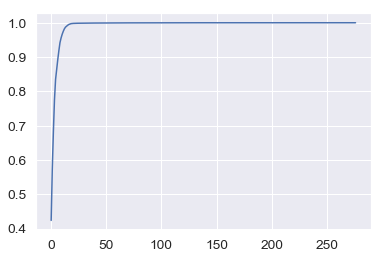

In [1088]:
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)
plt.plot(range(len(cumulative_explained_variance)), cumulative_explained_variance)

In [1089]:
cumulative_explained_variance[14]

0.9901517937191674

In [1090]:
pca = PCA(n_components=14)
PC_items = pca.fit_transform(data)
PC_items.shape

(2915, 14)

In [1091]:
items_pca = pd.DataFrame(PC_items)
items_pca.columns = ['PC{}'.format(i + 1) for i in range(PC_items.shape[1])]
items_pca.index = data.index
items_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14
0,-8.907314,4.800333,-43.772303,11.459398,2.388965,-5.172197,-7.840888,15.269952,7.578667,-2.366509,-6.025536,2.557242,-3.823663,1.699835
1,5.861148,-38.785309,-2.399161,0.029950,-0.482935,-5.804765,2.789571,-16.649641,-18.824731,-2.219451,3.719817,-4.337257,-1.961015,-0.961810
2,18.428979,18.489906,-31.649112,3.131010,2.915024,-7.989161,-7.773068,12.726420,7.187107,-5.358512,-5.224812,0.081640,-4.769590,2.995274
3,-1.063531,28.323404,-16.548443,5.473723,-6.926572,-16.835472,-4.120464,-2.797060,9.756980,-0.144911,18.223557,16.203961,4.584267,7.455735
4,50.109009,18.758774,-45.564424,-7.219236,11.603393,6.430117,-3.549404,7.876087,-8.327816,-3.937721,-4.156176,3.418067,-1.995075,5.478825


In [1092]:
pca_xtrain = items_pca[:1456]
pca_xtest = items_pca[1456:]

In [1093]:
print(pca_xtrain.shape)
print(pca_xtest.shape)

(1456, 14)
(1459, 14)


In [1094]:
X_train = pca_xtrain.copy()
X_test = pca_xtest.copy()
Y_train = Y

In [1095]:
model = LinearRegression()
model.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [1096]:
y_preds = model.predict(X_test)

In [1097]:
p_train = model.predict(X_train)
print( 'R-SQUARE:', r2_score(Y,p_train ))
print( 'MAE:', mean_absolute_error(Y_train, p_train))

R-SQUARE: 0.7714455967524539
MAE: 0.13888607653704424


In [1098]:
model2 = RandomForestRegressor(n_estimators=100, max_depth = 10 )
model2.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [1099]:
pred_y=model2.predict(X_test)
p_trn = model2.predict(X_train)
print( 'R-SQUARE:', r2_score(Y,p_trn ))
print( 'MAE:', mean_absolute_error(Y_train, p_trn))

R-SQUARE: 0.9457128211122173
MAE: 0.06974268409207819


In [1100]:
pred_pd = pd.DataFrame()
pred_pd['Id'] = ids
pred_pd['SalePrice'] = np.exp(pred)
pred_pd.head(20)

,Id,SalePrice
0,1461,135007.920819
1,1462,229533.232548
2,1463,209291.020305
3,1464,188623.100130
4,1465,171287.398503
5,1466,174792.321550
6,1467,157308.635990
7,1468,161209.188861
8,1469,170612.488603
9,1470,138625.115391
